### PREDICT SUBREDDIT CATEGORY
*The project aims at predicting the subreditt category (machine learning or artificial intelligence,or data science) based on the comment provided


In [2]:
#importing relevant libraries
from sklearn import neighbors,metrics,svm,linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords

In [3]:
posts_dataset = "Top_Posts.csv"
comments_dataset = "Top_Posts_Comments.csv"

posts = pd.read_csv(posts_dataset)
posts_df = pd.DataFrame(posts)

comments = pd.read_csv(comments_dataset)
comments_df = pd.DataFrame(comments)

#data cleaning
#post dataframe
posts_df["post_id"] = posts_df["post_id"].fillna("gh1dj9")
posts_df["post_title"] = posts_df["post_title"].fillna("AI can turn old photos into moving Images.")
posts_df["subreddit"] = posts_df["subreddit"].fillna("MachineLearning")
posts_df["post_url"] = posts_df["post_url"].fillna("https://v.redd.it/25nxi9ojfha61")
posts_df["flair_text"] = posts_df["flair_text"].fillna("Project")
posts_df["score"] = posts_df["score"].fillna("7798")
posts_df["comments"] = posts_df["comments"].fillna("186")
posts_df["upvote_ratio"] = posts_df["upvote_ratio"].fillna("0.99")
posts_df["date-time"] = posts_df["date-time"].fillna("2020-05-10 13:19:54")
posts_df["year"] = posts_df["year"].fillna("2020")

#comments dataframe
comments_df["post_id"] = comments_df["post_id"].fillna("gh1dj9")
comments_df["comment"] = comments_df["comment"].fillna("Hydranet bro!")


#merge the two dataframes

merged_df = pd.merge(posts_df,comments_df,on="post_id")


In [4]:
#mapping values
merged_df = pd.merge(posts_df,comments_df,on="post_id")

x = merged_df[{
    "subreddit",
    "comment",
    }
].values


docs = [];
texts = np.array(merged_df["comment"])
categories = np.array(merged_df["subreddit"])
for text,category in zip(texts,categories):
    docs.append((text,category))

labels = ["MachineLearning","artificial","DataScience"]



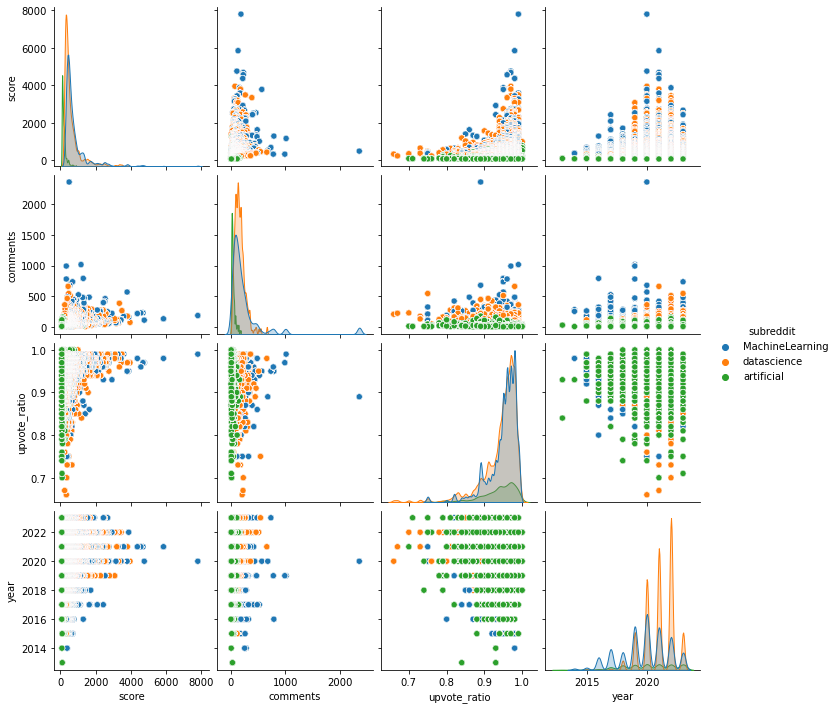

In [326]:
sns.pairplot(merged_df,hue="subreddit")

In [327]:
def trainTestSplit(docs):
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    
    pivot = 0.75*(len(docs))
    
    for i in range(0,round(pivot)):
        X_train.append(docs[i][0])
        y_train.append(docs[i][1])
        
    
    for i in range(round(pivot),len(docs)):
        X_test.append(docs[i][0])
        y_test.append(docs[i][1])
    
    return X_train,X_test,y_train,y_test



In [328]:
#split data into training and testing data
X_train,X_test,y_train,y_test = trainTestSplit(docs)

#vectorize text documents
vectorizer = CountVectorizer(stop_words="english",ngram_range=(1,3),min_df=3,analyzer="word",lowercase=False)


dataMatrix = vectorizer.fit_transform(X_train)
Xtestfdiff = vectorizer.transform(X_test)

testText = "AI will become a thing of the future"

In [329]:
def evaluateAlgorithm(algorithm):
    algorithm.fit(dataMatrix,y_train)

    model_prediction = algorithm.predict(Xtestfdiff)

    accuracy = algorithm.score(Xtestfdiff,y_test)
    predicted = algorithm.predict(Xtestfdiff)[3]


    vectorized_text = vectorizer.transform([testText])
    prediction = algorithm.predict(vectorized_text)
    print(metrics.classification_report(y_test, model_prediction))
    
    cm = confusion_matrix(algorithm.predict(Xtestfdiff),y_test)
    plt.figure(figsize=(13,9))
    sns.heatmap(cm, annot=True, fmt="", cmap="Greens")

                 precision    recall  f1-score   support

MachineLearning       0.15      0.83      0.26      4976
     artificial       0.29      0.00      0.00     18196
    datascience       0.86      0.76      0.81     32620

       accuracy                           0.52     55792
      macro avg       0.44      0.53      0.36     55792
   weighted avg       0.61      0.52      0.50     55792



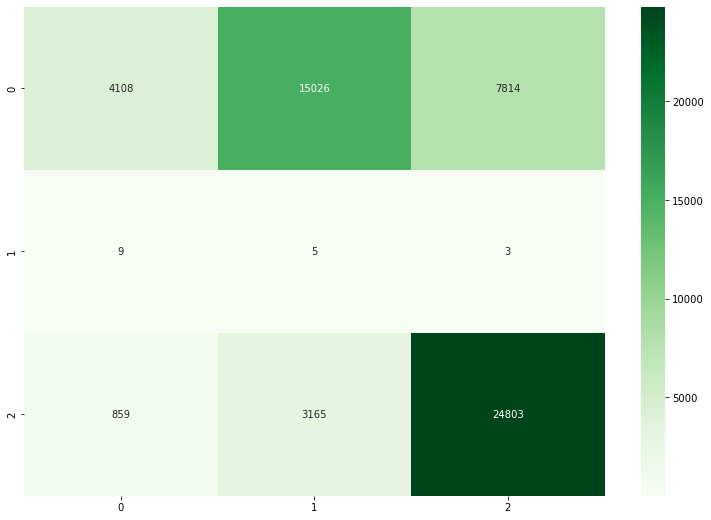

In [330]:
#Naive Bayes 
model = MultinomialNB()
evaluateAlgorithm(model)

                 precision    recall  f1-score   support

MachineLearning       0.13      0.74      0.22      4976
     artificial       0.64      0.01      0.03     18196
    datascience       0.79      0.64      0.71     32620

       accuracy                           0.45     55792
      macro avg       0.52      0.47      0.32     55792
   weighted avg       0.68      0.45      0.44     55792



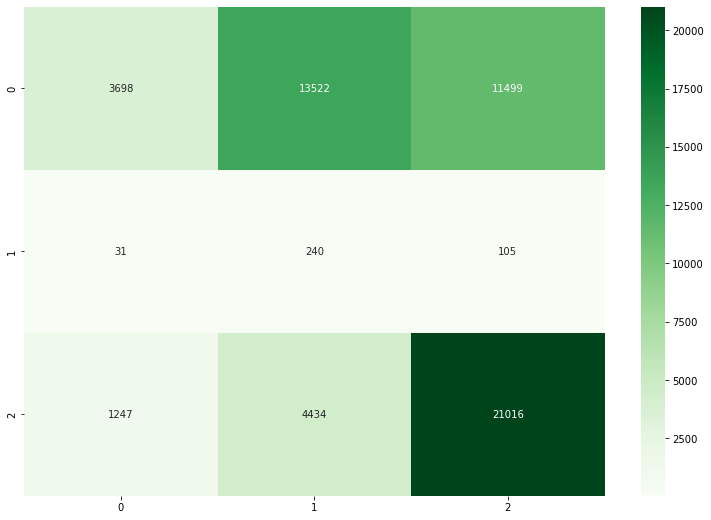

In [331]:
#Decision tree classifier implemetation
clf_DecisionTree = DecisionTreeClassifier(random_state=42)
evaluateAlgorithm(clf_DecisionTree)

In [ ]:
#SVM 
knn_model = neighbors.KNeighborsClassifier(n_neighbors=10,weights="uniform")
evaluateAlgorithm(knn_model)